<a href="https://colab.research.google.com/github/cauancalmeida/Desafios_Kaggle/blob/main/Desafio_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/cauancalmeida/Desafios_Kaggle/refs/heads/main/Dados/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/cauancalmeida/Desafios_Kaggle/refs/heads/main/Dados/test.csv')
df_sub = pd.read_csv('https://raw.githubusercontent.com/cauancalmeida/Desafios_Kaggle/refs/heads/main/Dados/gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Limpeza dos dados:

##Verificando os dados nulos:

In [7]:
#quantidade de dados nulos em cada coluna
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
#transformando as colunas nulas
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].mode()[0])

In [9]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Analise exploratoria

<Axes: xlabel='Pclass'>

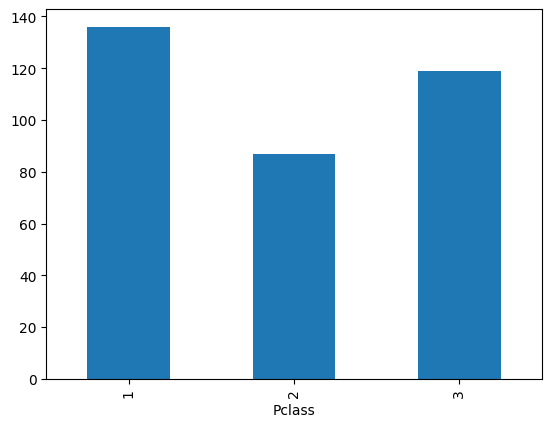

In [11]:
df_train.groupby('Pclass')['Survived'].sum().plot(kind='bar')

A distribuição de classe não ter afetado tanto na variavel survive, os dados estão bem distribuidos entre as classes, mesmo tendo mais pessoas da classe 1 ter sobrevivido.

<Axes: xlabel='Sex'>

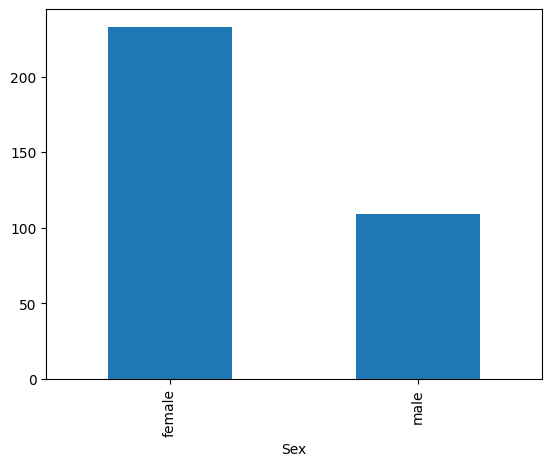

In [12]:
df_train.groupby('Sex')['Survived'].sum().plot(kind='bar')

Comparando os sexos, mostra que os sexo feminino sobreviveu mais que o masculino.

In [13]:
classex = pd.crosstab(df_train['Pclass'], df_train['Sex'])
classex

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


como vimos, mais mulheres sobreviveram, porém, havia mais homens na primeira classe do que mulheres, logo, a classe realmente não parece impactar na sobrevivencia.

<Axes: xlabel='Age', ylabel='Count'>

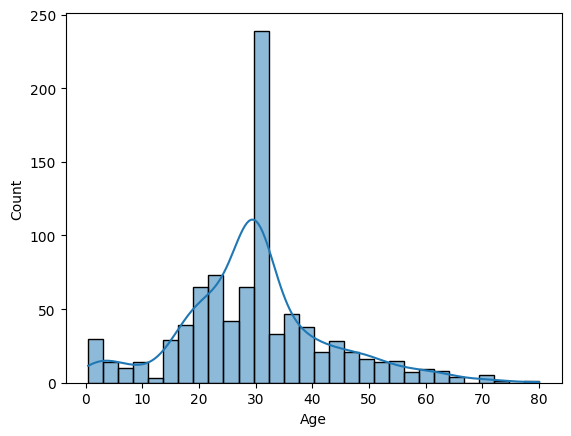

In [14]:
sns.histplot(x='Age', data=df_train,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

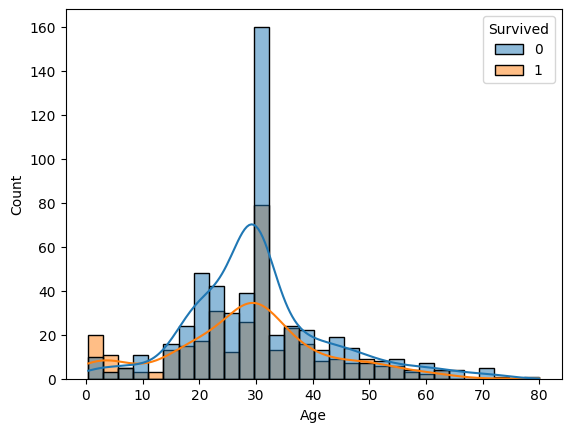

In [15]:
sns.histplot(x='Age', hue='Survived', data=df_train,kde=True)

In [16]:
df_train[(df_train['Age'] >= 18)]['Survived'].value_counts()

,count
Survived,
0,497
1,281


In [17]:
df_train[(df_train['Age'] <= 17)]['Survived'].value_counts()

,count
Survived,
1,61
0,52


Pelas analises, parece que a idade foi outro fator importante para a sobrevivencial. Se observarmos os graficos e contagens, menores de idade sobreviveram mais do que maiores de idade proporcionalmente.

### Verificando a correlação

In [21]:
#mapeando a substituição dos valores
mapeamento = {'male' : 0,
              'female' : 1,
              'S' : 2,
              'C' : 3,
              'Q' : 4}

In [20]:
for col in df_train.columns:
    print(f"Coluna: {col}")
    print(df_train[col].unique())
    print("-" * 30)

Coluna: PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 24

In [25]:
#Limpeza da tabela
df_train_limpo = df_train[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [26]:
#mapeamento
df_train_limpo['Sex'] = df_train_limpo['Sex'].map(mapeamento)
df_train_limpo['Embarked'] = df_train_limpo['Embarked'].map(mapeamento)

<ipython-input-26-0a9eb325dbf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_limpo['Sex'] = df_train_limpo['Sex'].map(mapeamento)
<ipython-input-26-0a9eb325dbf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_limpo['Embarked'] = df_train_limpo['Embarked'].map(mapeamento)


In [27]:
df_train_limpo

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,2
1,2,1,1,1,38.000000,1,0,71.2833,3
2,3,1,3,1,26.000000,0,0,7.9250,2
3,4,1,1,1,35.000000,1,0,53.1000,2
4,5,0,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,2
887,888,1,1,1,19.000000,0,0,30.0000,2
888,889,0,3,1,29.699118,1,2,23.4500,2
889,890,1,1,0,26.000000,0,0,30.0000,3


In [29]:
#estabelecendo correlação
correlacao = df_train_limpo.corr()
correlacao

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<Axes: >

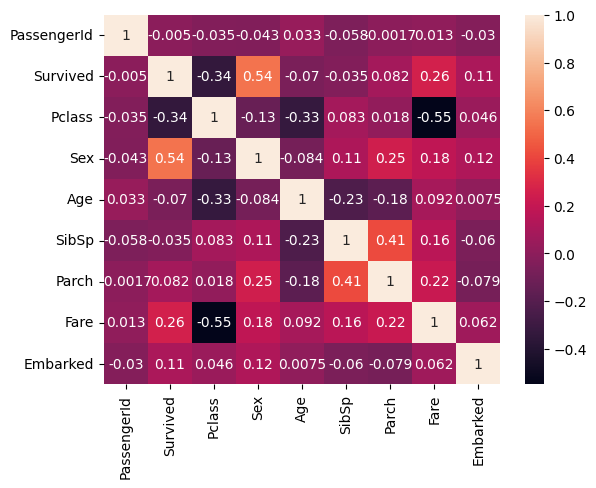

In [30]:
sns.heatmap(correlacao, annot=True)

In [31]:
correlacao['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Sex,0.543351
Fare,0.257307
Embarked,0.106811
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.069809
Pclass,-0.338481


Pelo que vimos a variavel que mais contribuiu para a sobrevivencia é o sexo.